# phygnn binary classification example

Here's an example of how to make a binary classifier using a phygnn model without a p_fun.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from rex import init_logger

from phygnn import PhysicsGuidedNeuralNetwork

In [2]:
init_logger('phygnn', log_level='INFO', log_file=None)

<Logger phygnn (INFO)>

In [3]:
x1 = np.arange(500) - 250
x2 = np.arange(500) - 250
x1, x2 = np.meshgrid(x1, x2)
x1 = x1.flatten()
x2 = x2.flatten()
x3 = x1 * x2
features = pd.DataFrame({'x1': x1, 'x2': x2})
features.head()

,x1,x2
0,-250,-250
1,-249,-250
2,-248,-250
3,-247,-250
4,-246,-250


In [4]:
y = ((x1 * x2) > 0).astype(bool).astype(float)
labels = pd.DataFrame({'y': y})
labels.head()

,y
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [5]:
hidden_layers = [{'units': 16},
                 {'activation': 'relu'},
                 {'units': 16}, 
                 {'activation': 'relu'},
                ]
output_layer = [{'units': 1}, 
                {'activation': 'sigmoid'},
               ]

In [6]:
PhysicsGuidedNeuralNetwork.seed(0)
model = PhysicsGuidedNeuralNetwork(p_fun=None, 
                                   hidden_layers=hidden_layers,
                                   output_layer=output_layer,
                                   loss_weights=(1.0, 0.0), 
                                   metric='binary_crossentropy',
                                   learning_rate=0.05,
                                   n_features=2, n_labels=1)
model.fit(features, labels, features, n_batch=1, n_epoch=50)

INFO - 2021-11-01 11:35:25,245 [phygnn.py:498] : Epoch 0 train loss: 1.26e+01 val loss: 8.18e+00 for "phygnn"
INFO - 2021-11-01 11:35:25,409 [phygnn.py:498] : Epoch 1 train loss: 8.26e+00 val loss: 1.73e+00 for "phygnn"
INFO - 2021-11-01 11:35:25,581 [phygnn.py:498] : Epoch 2 train loss: 1.75e+00 val loss: 3.29e+00 for "phygnn"
INFO - 2021-11-01 11:35:25,758 [phygnn.py:498] : Epoch 3 train loss: 3.31e+00 val loss: 3.03e+00 for "phygnn"
INFO - 2021-11-01 11:35:25,916 [phygnn.py:498] : Epoch 4 train loss: 3.06e+00 val loss: 1.59e+00 for "phygnn"
INFO - 2021-11-01 11:35:26,053 [phygnn.py:498] : Epoch 5 train loss: 1.63e+00 val loss: 6.06e-01 for "phygnn"
INFO - 2021-11-01 11:35:26,227 [phygnn.py:498] : Epoch 6 train loss: 6.22e-01 val loss: 1.46e-01 for "phygnn"
INFO - 2021-11-01 11:35:26,392 [phygnn.py:498] : Epoch 7 train loss: 1.44e-01 val loss: 1.58e-01 for "phygnn"
INFO - 2021-11-01 11:35:26,584 [phygnn.py:498] : Epoch 8 train loss: 1.55e-01 val loss: 3.75e-01 for "phygnn"
INFO - 202

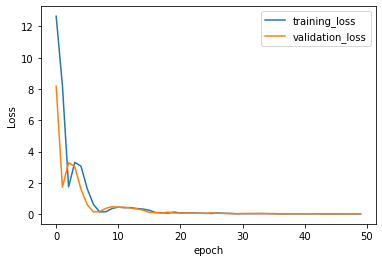

Accuracy: 99.49%


In [7]:
model.history[['training_loss', 'validation_loss']].plot()
plt.ylabel('Loss')
plt.show()
plt.close()

y_pred = model.predict(features)
accuracy = 100 * (np.round(y_pred) == labels.values).sum() / len(labels)
print('Accuracy: {:.2f}%'.format(accuracy))